# Coursera - Capstone Project for IBM Data Science Certificate
## Opening of a new Peruvian Restaurant in Barranquilla, Colombia
### The battle of the neighborhoods" **by Carlos Barros**

## 1. Introduction

### 1.1 Problem 
According to the economic projections with respect to Peruvian restaurants in Colombia, it is expected that by 2019 they will exceed sales to 62 million dollars . Up to 2018, 81 Peruvian food points were registered in the country, 33 are in Bogotá and 29 in Medellin , the rest are in other regions.

A franchise of **Peruvian restaurants** has decided to start a new plaza in the city of Barranquilla, among its reasons is: geographically strategic position with opening to the Magdalena River and for being one of the epicenters in terms of business in Colombia. The central objective of this research study is to analyze and select the best locations in the city of Barranquilla, Colombia so that the franchise opens to its new location. With the use of data science methodology and automatic learning techniques such as grouping.

My proposal is to analyze the sectors of Barranquilla to consider the opening of new Peruvian restaurants, according to the requirements demanded by the franchise:

- Proximity and ease for customers
- There is no presence of the competition at least with a radius of 1km away.
- It is surrounded by companies from different economic sectors.
- The proximity to places of high influx of traffic, via major.

###  1.2 Interest 
Of course, any investor who is thinking of opening a new restaurant of Peruvian food in the city and also for Big Data students who want to expand their knowledge and be able to carry out similar projects.


## 2.Data acquisition and cleaning 
### 2.1 Data sources 
To make a good choice to open Peruvian restaurants in Barranquilla, the following information is required:
- List / Information on the Barranquilla sectors with their Geodata (latitude and longitude).
- List / Information on the main roads in Barranquilla with geographic data.

### 2.2 Data cleaning 
The data that we will use for this analysis is a combination of a **.csv** file that has been prepared for the purposes of the analysis of multiple sources (Barrios_coord.csv) and the location / location information on **Foursquare**.

The file will be read directly in Jupiter's notebook for convenience and space saving. However, the grouping of city sectors and mapping will be shown. An algorithm was used to determine the Nominatim geodata. The coding of the real algorithm can be shown in 'markdown', keep in mind that this will take a while to be executed.

**Source 1: Barrios_coord.csv**

## 3. Exploratory Data Analysis 
16 strategic neighborhoods were commercially taken in the city of Barranquilla and the latitudes and longitudes of their locations were manually searched with the help of **Google Maps** and with the data provided by the DANE (National Administrative Department of Statistics, by its acronyms in Spanish). Next, an example of the table generated by the obtained data.



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">Import Libraries</a>
<li><a href="#ref2">Sectors of the city of Barranquilla - Data and mapping </a>
<li><a href="#ref3">Use the Foursquare API to explore the neighborhoods</a>
<li><a href="#ref3">Exploratory Data Analysis</a>
<li><a href="#ref3">Recommendations</a>
<li><a href="#ref3">Conclusion</a>

    
</div>
 
<hr>



## 1. Import Libraries

In [1]:

import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# !conda update -n base -c defaults conda

#mapping tools
!pip install geopy 

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

!pip install folium
# map rendering library
import folium 

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans





print('Libraries imported.')

     |████████████████████████████████| 112kB 5.4MB/s eta 0:00:01
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.

## 2. Sectors of the city of Barranquilla - Data and mapping.

Cluster neighborhood data was produced with Foursquare during the laboratory work of the course. A csv file was produced containing the neighborhoods around the 17 main and commercial districts of the city of Barranquilla. Now, the csv file has just been read for convenience and consolidation of the report.

In [2]:
import os
cwd = os.getcwd()
cwd

'/resources/labs/IBM DATA SCIENCE CERTIFICATE/#9 Applied Data Science Capstone/Translate spanish/WEEK 4 THE BATTLE OF NEIGHBORHOODS '

In [3]:
# Read csv file with clustered neighborhoods with geodata
bq_data  = pd.read_csv('Barrios_coord.csv') 
bq_data

,Neighborhood,Latitude,Longitude
0,Altos De Riomar,11.015578,-74.820644
1,Miramar,11.003472,-74.835111
2,Andalucia,11.016125,-74.815162
3,Altos Del Limon,11.013992,-74.826282
4,El Golf,11.008695,-74.808828
5,Riomar,11.011865,-74.831650
6,Villa Country,11.006075,-74.804908
7,El Tabor,11.002278,-74.828940
8,Alto Prado,11.001832,-74.809796
9,Prado,11.001382,-74.798429


In [4]:
# get the coordinates of Barranquilla
address = 'Barranquilla,Atlántico,Colombia'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barranquilla, Atlántico {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barranquilla, Atlántico 10.9799669, -74.8013085.


In [5]:
latitude= 11.008799
longitude= -74.805004 

# create map of Barranquilla using latitude and longitude values
map_bq = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, neighborhood in zip(bq_data['Latitude'], bq_data['Longitude'], bq_data['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_bq)  
    
map_bq

In [6]:
# save the map as HTML file
map_bq.save('map_bq.html')

## 3. Use the Foursquare API to explore the neighborhoods

In [7]:
# credentails
CLIENT_ID = 'N1FXT1RQOUZAZCMKURH3PFJYM5VGHNSMZQHK4JXWVQ5DDI1Y' # your Foursquare ID
CLIENT_SECRET = 'PLQF0OEC3F2QSJREOWM2YSTJTOAWWAAP324E1EWBFA0AGHTG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 2000
LIMIT = 250

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: N1FXT1RQOUZAZCMKURH3PFJYM5VGHNSMZQHK4JXWVQ5DDI1Y
CLIENT_SECRET:PLQF0OEC3F2QSJREOWM2YSTJTOAWWAAP324E1EWBFA0AGHTG


##### **Let's explore 'Barranquilla'.. that sounds like a cool spot**

In [8]:
#define objects for 'Studio District' index [15] in bq_data
neighborhood_latitude = bq_data.loc[15, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[15, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[15, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Las Tres Aves Marias are 11.021004, -74.808954.


##### **Now, let's get the top 100 venues that are in Barranquilla within a radius of 2000 m**

In [9]:
#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display GET request URL

'https://api.foursquare.com/v2/venues/explore?&client_id=N1FXT1RQOUZAZCMKURH3PFJYM5VGHNSMZQHK4JXWVQ5DDI1Y&client_secret=PLQF0OEC3F2QSJREOWM2YSTJTOAWWAAP324E1EWBFA0AGHTG&v=20180605&ll=11.021004,-74.808954&radius=2000&limit=250'

In [10]:
results = requests.get(url).json()
results # remove ';' if you want to see json data

{'meta': {'code': 200, 'requestId': '5ea359809388d7001b9c6031'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Barranquilla',
  'headerFullLocation': 'Barranquilla',
  'headerLocationGranularity': 'city',
  'totalResults': 57,
  'suggestedBounds': {'ne': {'lat': 11.039004018000018,
    'lng': -74.79065001275015},
   'sw': {'lat': 11.003003981999981, 'lng': -74.82725798724985}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d56dcf158856dcbebf65d6d',
       'name': 'La Piazzeta de Michel y Flavia',
       'location': {'address': 'Cra 64B # 84 - 131',
        'lat': 11.013101964600247,
        'lng': -74.81157687644473,
        'labeledLatLngs': [{'label': 'display',
          'l

## 4. Exploratory Data Analysis

##### **Clean the json and structure it into a pandas dataframe**#

In [11]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [12]:
venues = results['response']['groups'][0]['items']
    
df_bq = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_bq = df_bq.loc[:, filtered_columns]

# filter the category for each row
df_bq['venue.categories'] = df_bq.apply(get_category_type, axis=1)

# clean columns

df_bq.columns = [col.split(".")[-1] for col in df_bq.columns]
df_bq.insert(0, 'neighborhood', 'Barranquilla')

print('{} venues were returned by Foursquare.'.format(df_bq.shape[0]))
df_bq.head()

57 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Barranquilla,La Piazzeta de Michel y Flavia,Italian Restaurant,11.013102,-74.811577
1,Barranquilla,Restaurante Damascus,Middle Eastern Restaurant,11.015682,-74.805443
2,Barranquilla,Panadería La Baguette,Bakery,11.011363,-74.808232
3,Barranquilla,Parque El Golf,Park,11.010391,-74.807807
4,Barranquilla,Olímpica Calle 84,Department Store,11.014181,-74.809693


##### **Create a map of the Barranquilla district and highlight nearby venues**

In [13]:
map_bq = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=14)

# add markers to map
for lat, lng, name, categories in zip(df_bq['lat'], df_bq['lng'], df_bq['name'], df_bq['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_bq) 
    
map_bq

In [14]:
df_bq['categories'].value_counts()

Supermarket                  4
Ice Cream Shop               4
Furniture / Home Store       3
Italian Restaurant           3
Department Store             3
Bakery                       2
Fast Food Restaurant         2
Pizza Place                  2
Restaurant                   2
Convention Center            2
Business Service             1
American Restaurant          1
Middle Eastern Restaurant    1
Martial Arts Dojo            1
Burger Joint                 1
Peruvian Restaurant          1
Pub                          1
Brazilian Restaurant         1
Sushi Restaurant             1
Bar                          1
Zoo                          1
Factory                      1
Soccer Field                 1
Gym                          1
Coffee Shop                  1
Japanese Restaurant          1
Golf Course                  1
Dessert Shop                 1
Sporting Goods Shop          1
Breakfast Spot               1
Public Art                   1
Park                         1
Waterfro

#### Let's create a similar dataframe for each neighborhood:

**Index # 1 Miramar**

In [15]:
#define objects for 'Miramar' index [1] in bq_data
neighborhood_latitude = bq_data.loc[1, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[1, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[1, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_miramar = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_miramar = df_miramar.loc[:, filtered_columns]

# filter the category for each row
df_miramar['venue.categories'] = df_miramar.apply(get_category_type, axis=1)

# clean columns

df_miramar.columns = [col.split(".")[-1] for col in df_miramar.columns]
df_miramar.insert(0, 'neighborhood', 'Miramar')

print('{} venues were returned by Foursquare.'.format(df_miramar.shape[0]))
df_miramar.head()

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Miramar,Bodytech Miramar,Gym / Fitness Center,11.003574,-74.835128
1,Miramar,Arabe Internacional,Falafel Restaurant,11.006065,-74.826594
2,Miramar,Zahle,Middle Eastern Restaurant,11.005083,-74.826653
3,Miramar,Popsy,Ice Cream Shop,11.004006,-74.827308
4,Miramar,Shawarma khala light,Middle Eastern Restaurant,11.002034,-74.827789


**Index # 3 - Altos del limón**


In [16]:
#define objects for 'Altos del limón' index [3] in bq_data
neighborhood_latitude = bq_data.loc[3, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[3, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[3, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_altos_del_limon = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_altos_del_limon = df_altos_del_limon.loc[:, filtered_columns]

# filter the category for each row
df_altos_del_limon['venue.categories'] = df_altos_del_limon.apply(get_category_type, axis=1)

# clean columns

df_altos_del_limon.columns = [col.split(".")[-1] for col in df_altos_del_limon.columns]
df_altos_del_limon.insert(0, 'neighborhood', 'Altos del limón')

print('{} venues were returned by Foursquare.'.format(df_altos_del_limon.shape[0]))
df_altos_del_limon.head()

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Altos del limón,Parque Bulevar Buenavista,Park,11.015699,-74.826604
1,Altos del limón,Centro Comercial Buenavista I,Shopping Mall,11.013285,-74.827622
2,Altos del limón,Centro Comercial Buenavista II,Shopping Mall,11.014186,-74.828039
3,Altos del limón,El Giratorio,Gastropub,11.012761,-74.827267
4,Altos del limón,Salvator's Pizza,Pizza Place,11.014151,-74.826245


**Index # 6 - Villa Country**


In [17]:
#define objects for 'Villa Country' index [6] in bq_data
neighborhood_latitude = bq_data.loc[6, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[6, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[6, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_villa_country = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_villa_country  = df_villa_country .loc[:, filtered_columns]

# filter the category for each row
df_villa_country ['venue.categories'] = df_villa_country .apply(get_category_type, axis=1)

# clean columns

df_villa_country .columns = [col.split(".")[-1] for col in df_villa_country .columns]
df_villa_country .insert(0, 'neighborhood', 'Villa Country')

print('{} venues were returned by Foursquare.'.format(df_villa_country .shape[0]))
df_villa_country .head()

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Villa Country,Country Club,Golf Course,11.004848,-74.804546
1,Villa Country,SUSHI MAS Comida Japonesa,Sushi Restaurant,11.004008,-74.803655
2,Villa Country,Noa Sushi & Robata,Japanese Restaurant,11.003397,-74.808010
3,Villa Country,El Celler,Mediterranean Restaurant,11.002711,-74.804737
4,Villa Country,Caprichosa Pizza Gourmet,Pizza Place,11.005517,-74.807549


**Index # 8 - Alto Prado**


In [18]:
#define objects for 'Alto Prado' index [8] in bq_data
neighborhood_latitude = bq_data.loc[8, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[8, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[8, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_alto_prado = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_alto_prado  = df_alto_prado .loc[:, filtered_columns]

# filter the category for each row
df_alto_prado ['venue.categories'] = df_alto_prado .apply(get_category_type, axis=1)

# clean columns

df_alto_prado .columns = [col.split(".")[-1] for col in df_alto_prado .columns]
df_alto_prado .insert(0, 'neighborhood', 'Alto Prado')

print('{} venues were returned by Foursquare.'.format(df_alto_prado .shape[0]))
df_alto_prado .head()

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Alto Prado,Noa Sushi & Robata,Japanese Restaurant,11.003397,-74.808010
1,Alto Prado,Discovery Sushi Bar,Sushi Restaurant,10.999717,-74.809828
2,Alto Prado,Varadero Pescados & Mariscos,Caribbean Restaurant,11.002769,-74.810050
3,Alto Prado,Fior Di Pizza,Pizza Place,11.001325,-74.807735
4,Alto Prado,La Girolata,Italian Restaurant,11.003184,-74.807493


**Index # 10- Villa Campestre**


In [19]:
#define objects for 'Villa Campestre' index [10] in bq_data
neighborhood_latitude = bq_data.loc[10, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[10, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[10, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_villa_campestre = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_villa_campestre  = df_villa_campestre .loc[:, filtered_columns]

# filter the category for each row
df_villa_campestre ['venue.categories'] = df_villa_campestre .apply(get_category_type, axis=1)

# clean columns

df_villa_campestre .columns = [col.split(".")[-1] for col in df_villa_campestre .columns]
df_villa_campestre .insert(0, 'neighborhood', 'Villa Campestre')

print('{} venues were returned by Foursquare.'.format(df_villa_campestre .shape[0]))
df_villa_campestre .head()

16 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Villa Campestre,Centro Comercial Le Champ,Shopping Mall,11.018798,-74.864641
1,Villa Campestre,Centro Comercial Villa Campestre Plaza,Shopping Mall,11.022525,-74.862863
2,Villa Campestre,Valestrino Pastas y Pizzas,Pizza Place,11.021320,-74.868225
3,Villa Campestre,La panatta,Pizza Place,11.016883,-74.849814
4,Villa Campestre,Buffalo Grill Parrilla,Steakhouse,11.018519,-74.864656


**Index # 13 - Ciudad Jardin**


In [20]:
#define objects for 'Ciudad Jardin' index [13] in bq_data
neighborhood_latitude = bq_data.loc[13, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bq_data.loc[13, 'Longitude'] # neighborhood longitude value
neighborhood_name = bq_data.loc[13, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_ciudad_jardin = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_ciudad_jardin  = df_ciudad_jardin .loc[:, filtered_columns]

# filter the category for each row
df_ciudad_jardin ['venue.categories'] = df_ciudad_jardin .apply(get_category_type, axis=1)

# clean columns

df_ciudad_jardin .columns = [col.split(".")[-1] for col in df_ciudad_jardin .columns]
df_ciudad_jardin .insert(0, 'neighborhood', 'Ciudad Jardin')

print('{} venues were returned by Foursquare.'.format(df_ciudad_jardin .shape[0]))
df_ciudad_jardin .head()

100 venues were returned by Foursquare.


,neighborhood,name,categories,lat,lng
0,Ciudad Jardin,Yona's Burger House,Burger Joint,10.996785,-74.816428
1,Ciudad Jardin,Panadería Zapatoca,Bakery,10.996531,-74.815711
2,Ciudad Jardin,Pietrini's La Pizza,Pizza Place,10.997197,-74.821125
3,Ciudad Jardin,Parque Sagrado Corazón,Park,10.994013,-74.818376
4,Ciudad Jardin,Salvator's Pizza,Pizza Place,11.002856,-74.818450


**Analysis of venue distribution**

In [21]:
df_venues = pd.concat([df_miramar, df_altos_del_limon , df_villa_country, df_alto_prado, df_villa_campestre, df_ciudad_jardin])
df_venues['count'] = 1
df_venues.shape

(516, 6)

In [22]:
total_venues = pd.pivot_table(df_venues,index=["neighborhood"], values=["count"],aggfunc=np.sum)
total_venues

,count
neighborhood,
Alto Prado,100
Altos del limón,100
Ciudad Jardin,100
Miramar,100
Villa Campestre,16
Villa Country,100


In [23]:
df_venues2 = df_venues.copy()
df_venues3 = df_venues.copy()
df_venues_rest = df_venues2[df_venues2['categories'].str.contains('Restaurant')].reset_index(drop=True)
df_venues_rest['Venue Type'] = 'Restaurant'
df_venues_hotel = df_venues3[df_venues3['categories'].str.contains('Hotel')].reset_index(drop=True)
df_venues_hotel['Venue Type'] = 'Hotel'
df_venues_final = pd.concat([df_venues_rest,df_venues_hotel]).reset_index(drop=True)
df_venues_final.shape

(208, 7)

In [24]:
pivot = pd.pivot_table(df_venues_final,index=["neighborhood","Venue Type"], values=["count"],aggfunc=np.sum)
pivot

count
neighborhood    Venue Type       
Alto Prado      Restaurant     45
Altos del limón Hotel           6
                Restaurant     28
Ciudad Jardin   Hotel           4
                Restaurant     40
Miramar         Hotel           8
                Restaurant     29
Villa Campestre Restaurant      4
Villa Country   Restaurant     44

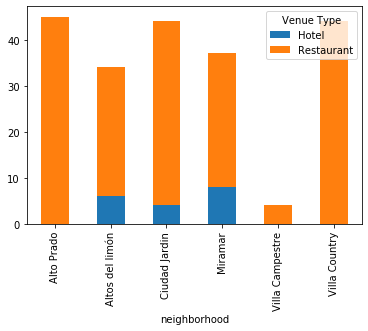

In [25]:
df_venues_final.groupby('neighborhood')['Venue Type']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

**Create 'one hot' file with dummy values by venue category**

In [26]:
# one hot encoding
bq_onehot = pd.get_dummies(df_venues_final[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bq_onehot['neighborhood'] = df_venues_final['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bq_onehot.columns[-1]] + list(bq_onehot.columns[:-1])
bq_onehot = bq_onehot[fixed_columns]

bq_onehot.head()

,neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Peruvian Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant
0,Miramar,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Miramar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,Miramar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,Miramar,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Miramar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [27]:
bq_grouped = bq_onehot.groupby('neighborhood').mean().reset_index()
bq_grouped

,neighborhood,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Brazilian Restaurant,Caribbean Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Hotel,Italian Restaurant,Japanese Restaurant,Latin American Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Peruvian Restaurant,Restaurant,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant
0,Alto Prado,0.022222,0.066667,0.044444,0.022222,0.022222,0.022222,0.000000,0.044444,0.088889,0.022222,0.000000,0.111111,0.022222,0.000000,0.044444,0.044444,0.133333,0.022222,0.155556,0.044444,0.022222,0.044444,0.000000,0.000000,0.000000
1,Altos del limón,0.029412,0.058824,0.029412,0.029412,0.029412,0.000000,0.000000,0.058824,0.117647,0.029412,0.176471,0.117647,0.000000,0.000000,0.000000,0.029412,0.117647,0.000000,0.029412,0.088235,0.000000,0.058824,0.000000,0.000000,0.000000
2,Ciudad Jardin,0.022727,0.068182,0.022727,0.000000,0.022727,0.022727,0.000000,0.045455,0.090909,0.022727,0.090909,0.090909,0.022727,0.022727,0.022727,0.045455,0.159091,0.045455,0.090909,0.022727,0.022727,0.045455,0.000000,0.000000,0.000000
3,Miramar,0.000000,0.054054,0.027027,0.000000,0.000000,0.000000,0.000000,0.054054,0.081081,0.027027,0.216216,0.081081,0.000000,0.000000,0.000000,0.027027,0.135135,0.000000,0.081081,0.081081,0.000000,0.081081,0.000000,0.027027,0.027027
4,Villa Campestre,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Villa Country,0.022727,0.022727,0.045455,0.022727,0.022727,0.022727,0.022727,0.022727,0.090909,0.022727,0.000000,0.136364,0.022727,0.000000,0.045455,0.045455,0.090909,0.022727,0.136364,0.090909,0.022727,0.045455,0.022727,0.000000,0.000000


In [28]:
bq_grouped.shape

(6, 26)

In [29]:
len(bq_grouped[bq_grouped["Peruvian Restaurant"] > 0])

3

##### **Create a new DataFrame for Peruvian Restaurant data only**

In [30]:
bq_peruvian = bq_grouped[["neighborhood","Peruvian Restaurant"]]

In [31]:
bq_peruvian

,neighborhood,Peruvian Restaurant
0,Alto Prado,0.022222
1,Altos del limón,0.000000
2,Ciudad Jardin,0.045455
3,Miramar,0.000000
4,Villa Campestre,0.000000
5,Villa Country,0.022727


In [32]:
# set number of clusters
kclusters = 4

bq_clustering = bq_peruvian.drop(["neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bq_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 2, 0, 0, 1], dtype=int32)

In [33]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
bq_merged = bq_peruvian.copy()


# add clustering labels
bq_merged["Cluster Labels"] = kmeans.labels_

In [34]:
bq_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
bq_merged.head()

,neighborhood,Peruvian Restaurant,Cluster Labels
0,Alto Prado,0.022222,3
1,Altos del limón,0.000000,0
2,Ciudad Jardin,0.045455,2
3,Miramar,0.000000,0
4,Villa Campestre,0.000000,0


In [35]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bq_merged = bq_merged.join(bq_data.set_index("Neighborhood"), on="neighborhood")

print(bq_merged.shape)
bq_merged.head() # check the last columns!

(6, 5)


,neighborhood,Peruvian Restaurant,Cluster Labels,Latitude,Longitude
0,Alto Prado,0.022222,3,11.001832,-74.809796
1,Altos del limón,0.000000,0,NaN,NaN
2,Ciudad Jardin,0.045455,2,10.994720,-74.818642
3,Miramar,0.000000,0,11.003472,-74.835111
4,Villa Campestre,0.000000,0,11.023403,-74.862230


In [36]:
# sort the results by Cluster Labels
print(bq_merged.shape)
bq_merged.sort_values(["Cluster Labels"], inplace=True)
bq_merged

(6, 5)


,neighborhood,Peruvian Restaurant,Cluster Labels,Latitude,Longitude
1,Altos del limón,0.000000,0,NaN,NaN
3,Miramar,0.000000,0,11.003472,-74.835111
4,Villa Campestre,0.000000,0,11.023403,-74.862230
5,Villa Country,0.022727,1,11.006075,-74.804908
2,Ciudad Jardin,0.045455,2,10.994720,-74.818642
0,Alto Prado,0.022222,3,11.001832,-74.809796


In [37]:
bq_merged= bq_merged.drop([1])
bq_merged

,neighborhood,Peruvian Restaurant,Cluster Labels,Latitude,Longitude
3,Miramar,0.000000,0,11.003472,-74.835111
4,Villa Campestre,0.000000,0,11.023403,-74.862230
5,Villa Country,0.022727,1,11.006075,-74.804908
2,Ciudad Jardin,0.045455,2,10.994720,-74.818642
0,Alto Prado,0.022222,3,11.001832,-74.809796


In [38]:
# create map of Barranquilla using latitude and longitude values
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bq_merged['Latitude'], bq_merged['Longitude'], bq_merged['neighborhood'], bq_merged['Cluster Labels']):
    # label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5.Recommendations 

The 98th street between 53-56 races is currently having a large population growth (more and more buildings are being made in the sector), along with it can be said that this sector has a great commercial influence in the city. At present there is not a Peruvian food restaurant around, the closest one is 644m, however, it is considered that you can still take advantage of the opportunity due to its strategic geographical position. As can be seen in figure 5, Altos del Limón is where major hotels are present, as is Miramar, but which has few restaurants compared to other sectors. This also represents a great opportunity since many tourists will have more access to foreign food, especially Peruvian food.

## 6. Conclusion

The final result of this research study recommends the sector of Altos del Limón, on Calle 98 with carrera 56 for the reasons mentioned in the Recommendations section, and it is considered the best option considering all the factors: relatively volume high of activities for tourists and locals, it is a business center, it is close to other high rental neighborhoods and the proportion of hotels to restaurants is not too high. Other neighborhoods that were considered were Alto Prado, Ciudad Jardín, Miramar, Villa Campestre and Villa Country, but when not fulfilling most of the requirements, Altos de Limón was chosen as an option, and it was also essential to make the final decision about the distance between the competition. Finally, it is concluded that Barranquilla is not saturated in restaurants whose niche market is Peruvian food, only in the city there are 3 restaurants in this category.

**End of Project and Course/ Thanks to Coursera Team, IBM and Students!**